**Лабораторная работа 3, Кубышкина Екатерина, 11 вариант**

**Задача 3.1.11**

Метод Гаусса

Прямой ход состоит из $n-1$ шагов исключения.

1-й шаг. Целью этого шага является исключение неизвестного $x_1$ из уравнений с номерами $i = 2, 3, …, n$. 
Предположим, что коэффициент $a_{11}≠0$.Будем называть его главным элементом 1-го шага. 
Вычтем последовательно из второго, третьего, …, n-го уравнений системы первое уравнение, 
умноженное на соответствующий множитель.

2-й шаг. Целью этого шага является исключение неизвестного $x_2$ из уравнений с номерами $i = 3, 4, …, n$. 
Вычтем последовательно из третьего, четвертого, …, n-го уравнения системы второе уравнение, 
умноженное на соответствующий множитель.

Аналогично проводятся остальные шаги.

После $(n - 1)$-го шага исключения получим систему уравнений, матрица $A$ которой является верхней треугольной. 
На этом вычисления прямого хода заканчиваются.

Обратный ход. Из последнего уравнения системы находим $x_n$. 
Подставляя его в предпоследнее уравнение найдем $x_{n-1}$. И так далее вплоть до $x_1$

Число обусловленности

Число обусловленности матрицы показывает насколько матрица близка к матрице неполного ранга 
(для квадратных матриц - к вырожденности). Число обусловленности $cond(A)$ является количественной оценкой обусловленности. 
Отметим, что всегда $cond (A) ≥ 1$. Если $cond(A) ≥ 10^3$ , то говорят, что матрица $A$ плохо обусловлена. Если
$1 ≤ cond(A) ≤ 100$, то матрица считается хорошо обусловленной. 

In [40]:
import numpy as np
import copy
import matplotlib.pyplot as plt

N=11
n=4

def c(i,j):
    return 0.1*N*i*j 

1) Задать матрицу системы A и вектор правой части b. Используя встроенную функцию numpy.linalg.solve, найти решение x системы Ax=b с помощью метода Гаусса

In [13]:
A=np.array([[1/(67+c(i,j)**4) for j in range(n)] for i in range(n)])
print(A)
b=np.array([float(N)]*4)
b=b.reshape(4,1)
print(b)

[[0.01492537 0.01492537 0.01492537 0.01492537]
 [0.01492537 0.0146062  0.01105882 0.00538816]
 [0.01492537 0.01105882 0.00226342 0.00050904]
 [0.01492537 0.00538816 0.00050904 0.00010338]]
[[11.]
 [11.]
 [11.]
 [11.]]


In [15]:
x2=np.linalg.solve(A,b)
x2.reshape(4,1)

array([[737.],
       [ -0.],
       [ -0.],
       [ -0.]])

2) С помощью встроенной функции numpy.linag.cond вычислить число обусловленности матрицы A

In [17]:
np.linalg.cond(A)

23.94547108996224

3)  Принимая решение $x$, полученное в п.1, за точное, вычислить вектор $d=(d_1, .. , d_n)^T$, $d_i=\frac{||x-x^i||}{||x||}$, $i=1,..,n$ относительных погрешностей решений систем $x^i$ систем $Ax^i=b^i$, $i=1,..,n$, где компоненты векторов $b^i$ вычисляются по формулам: \begin{equation*}
b^i_k = 
 \begin{cases}
    b_k + \Delta, k=i\\
   b_k, k\neq i
 \end{cases}
\end{equation*}
(∆ − произвольная величина погрешности)

In [29]:
eps=0.0001
x=copy.copy(x1)

def vector_d(A, b):
    d = np.ones(n)
    for i in range(n):
        b_i = np.ones(n)
        for j in range(n):
            if (j == i):
                b_i[j] = b[j]+eps
            else:
                b_i[j] = b[j]
        x_i = np.linalg.solve(A, b_i)
        d_i = np.linalg.norm(x-x_i, np.inf)/np.linalg.norm(x, np.inf)
        d[i] = d_i
    return d
print(d.reshape(4,1))

[[1.87140079e-05]
 [3.43743723e-05]
 [3.69663551e-05]
 [2.78737410e-05]]


4) Определить компоненту $b_m$ вектора $b$, которая оказывает наибольшее влияние на погрешность решения. 

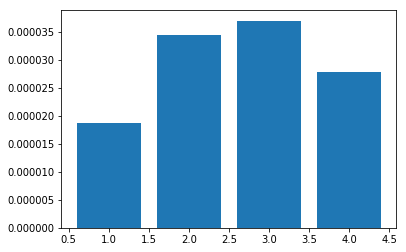

3.696635510094954e-05


In [32]:
xhist=np.arange(1,n+1)
yhist=copy.copy(d)
plt.bar(xhist,yhist)
plt.show()
print(max(d))

Значит, макс погрешностьу 3 компоненты вектора

In [30]:
ds = []
for i in range(n):
    b_m=np.array([float(N)]*4)
    b_m[i] += 1
    ds.append(np.linalg.norm(vector_d(A, b_m)))

print(ds)
max_value = max(ds)
max_index = ds.index(max_value)
print(max_index)

[0.3742801593572394, 0.6874874487269234, 0.7393271039589584, 0.5574748222718826]
2


5) Оценить теоретически погрешность решения $x^m$ по формуле: $\delta(x^m)\leq cond(A)\cdot\delta(b^m)$. Сравнить $\delta(x^m)$ 
    со значением практической погрешности $d^m$.
Объяснить полученные результаты

In [36]:
pg = np.linalg.cond(A)*eps
print('Сама погрешность = ',pg)

Сама погрешность =  0.0023945471089962243


In [37]:
for i in range(n):
    print(d[i]<=pg)

True
True
True
True


Погрешность решения по формуле всегда меньше самой погрешности

Практическая погрешность 3.696635510094954e-05 меньше теоретической 0.0023945471089962243, т.к. теоретическая погрешность не вычисляется с должной точностью

**Задача 3.3.3**

Дана матрица $A$. Найти число обусловленности матрицы, используя вычислительный эксперимент

In [92]:
A=np.array([[1,1,1,1,1],[1,2,3,4,5],[1,3,6,10,15],[1,4,10,20,35],[1,5,15,35,70]])
print(A)

[[ 1  1  1  1  1]
 [ 1  2  3  4  5]
 [ 1  3  6 10 15]
 [ 1  4 10 20 35]
 [ 1  5 15 35 70]]


1) Выбрать последовательность линейно независимых векторов $b^i, i= 1,..,k$. Решить $k$ систем уравнений $Ax^i=b^i$, используя
встроенную функцию numpy.linalg.solve

2)  Для каждого найденного решения $x^i$ вычислить отношение $\frac{||x^i||}{||b^i||}, i=1,..k$

In [94]:
k=3
b=[[4,-2,4,-2,4],[11,11,11,11,11],[-3,3,3,-4,-4]]
b2=[[3.99,-2.01,3.99,-2.01,3.99],[4,-2,4,-2,4],[4.01,-1.99,4.01,-1.99,4.01]]
g=[]
x=[]

for i in range(k):
    x_i=np.linalg.solve(A,b[i])
    x.append(x_i)
    g.append(np.linalg.norm(x_i, np.inf)/np.linalg.norm(b[i], np.inf)) 
print(g)
print(x)

[93.0, 1.0, 21.75]
[array([  94., -294.,  372., -216.,   48.]), array([11.,  0., -0., -0., -0.]), array([  1., -45.,  87., -61.,  15.])]


3) Вычислить норму матрицы $A^{-1}$  по формуле $||A^{-1}||\approx max \frac{||x^i||}{||b^i||}$

In [95]:
norm_A=max(g)
print(norm_A)

93.0


4) Вычислить число обусловленности матрицы $A$ по формуле $cond(A) = ||A|| \cdot ||A^{-1}||$

In [96]:
numb_A=np.linalg.norm(A,np.inf)*norm_A
print(numb_A)

11718.0


In [93]:
np.linalg.cond(A,np.inf)

15624.0

Не понимаю, почему числа получились разные. Все вычисления провела в одной норме. Возможно, все же влияет погрешность при 
вычислении нормы обратной матрицы

**Задача 3.10.3**

Дана система уравнений $Ax=b$ порядка $n$ с разреженной матрицей $A$. Решить систему методом прогонки

Метод прогонки является частным случаем метода Гаусса и применяется к системам с трех-пятидиагональной матрицей. 
Метод прогонки состоит из двух этапов: прямой прогонки и обратной прогонки. На первом этапе определяются прогоночные 
коэффициенты, а на втором – находят неизвестные $x_1,x_2,...,x_n$. 
1. В первой строке матрицы (i=1) используются формулы:
    $y_1=b_1, \alpha_1=frac{-c_1}{y_1}, \beta_1=frac{d_1}{y_1}$
2. Для строк $i$ от 2 до $n-1$ используются реккурентные формулы:
    $y_i=b_i+a_i\cdot\alpha_{i-1}, \alpha_i=frac{-c_i}{y_i}, \beta_i=frac{d_i-\alpha_i\beta_{i-1}}{y_i}$
3. Для $i=n$:
     $y_n=b_n+a_n\cdot\alpha_{n-1}, \beta_n=frac{d_n-\alpha_n\beta_{n-1}}{y_n}$
После этого производится обратная прогонка, в которой происходит вычисление неизвестных $x_i$.
4. $x_n=\beta_n$
5. $x_n=\alpha_i\cdot x_{i+1}+\beta_i, i=n-1,..,1$

In [119]:
#матрица из условия задачи
n=40
buf = np.zeros((n, n))
flat = buf.ravel()
flat[0::n+1] = 100
flat[2*n::n+1] = 3
flat[1::n+1] = 1
flat[2::n+1] = 1
buf[n-1,0]=0
print(buf)

[[100.   1.   1. ...   0.   0.   0.]
 [  0. 100.   1. ...   0.   0.   0.]
 [  3.   0. 100. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ... 100.   1.   1.]
 [  0.   0.   0. ...   0. 100.   1.]
 [  0.   0.   0. ...   3.   0. 100.]]


In [104]:
#вектор b
b=[]
for i in range(n):
    b.append((i+1)*np.exp(10/(i+1)))

In [135]:
#метод прогонки для трехдиагональной матрицы
def progon(A,b):
    alpha = [0]
    beta = [0]
    x = [0]*n
    flat = A.ravel()
    a=flat[0::n+1] #главная диагональ
    c=flat[n::n+1] # диагональ под главной
    d=flat[1::n+1] # диагональ над главной
    for i in range(n-1):
        alpha.append(-d[i]/(c[i]*alpha[i] + a[i]))
        beta.append((b[i] - c[i]*beta[i])/(c[i]*alpha[i] + a[i]))

    x[n-1] = (b[n-1] - c[n-2]*beta[n-1])/(a[n-1] + c[n-2]*alpha[n-1])

    for i in reversed(range(n-1)):
        x[i] = alpha[i+1]*x[i+1] + beta[i+1]

    return x

In [131]:
# еще одна матрица, не как в условии, но для которой работает метод
A = np.zeros((n, n))
flat = A.ravel()
flat[0::n+1] = 100
flat[n::n+1] = 3
flat[1::n+1] = 1
A[n-1,0]=0
print(A)

[[100.   1.   0. ...   0.   0.   0.]
 [  3. 100.   1. ...   0.   0.   0.]
 [  0.   3. 100. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ... 100.   1.   0.]
 [  0.   0.   0. ...   3. 100.   1.]
 [  0.   0.   0. ...   0.   3. 100.]]


In [132]:
print(progon(A,b))

[220.3011602544944, -3.650230642721879, 0.9459017138579828, 0.45539522594576975, 0.3527481066629703, 0.3042841505189133, 0.28028093093993595, 0.26819163963634035, 0.2627369032408864, 0.261320754659682, 0.26253210889958406, 0.2655427769156789, 0.26983667244725623, 0.2750763658571363, 0.2810323806705904, 0.2875434511896898, 0.29449305793479896, 0.3017949868097989, 0.3093841206179525, 0.31721038398561574, 0.32523465358714004, 0.3334259297488047, 0.3417593389451095, 0.35021469642165065, 0.35877545431673014, 0.3674279200937926, 0.3761606677449791, 0.3849640885981491, 0.393830044653529, 0.402751598197802, 0.41172279884190366, 0.42073851426474684, 0.4297942945610874, 0.4388862626710419, 0.4480110252304819, 0.4571655995959261, 0.4663473483442678, 0.4755544588046473, 0.4847329711952084, 0.4990681775392403]


In [136]:
print(np.linalg.solve(A,b))

[220.30116025  -3.65023064   0.94590171   0.45539523   0.35274811
   0.30428415   0.28028093   0.26819164   0.2627369    0.26132075
   0.26253211   0.26554278   0.26983667   0.27507637   0.28103238
   0.28754345   0.29449306   0.30179499   0.30938412   0.31721038
   0.32523465   0.33342593   0.34175934   0.3502147    0.35877545
   0.36742792   0.37616067   0.38496409   0.39383004   0.4027516
   0.4117228    0.42073851   0.42979429   0.43888626   0.44801103
   0.4571656    0.46634735   0.47555446   0.48473297   0.49906818]
